# Detecção de spam utilizando Nayve Bayes

O dataset foi extraído da [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection)

## Importação das bibliotecas

In [3]:
import pandas as pd

## Importação do dataset

In [4]:
sms_spam = pd.read_csv('SMSSpamCollection.csv', sep='\t',
header=None, names=['Label', 'SMS'])

In [5]:
sms_spam.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [6]:
sms_spam.shape

(5572, 2)

Nosso dataset possui 5572 linhas e duas colunas (Label e SMS)

In [7]:
sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

Como é possível observar, cerca de 86% dos emails do dataset não são do tipo spam, mostrando assim que não é um problema balanceado.

## Separando entre Treinamento e Teste

Separando 80% para treinamento e 20% para teste

In [8]:
# Randomizando o dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculando um index aleatório para o split
training_test_index = round(len(data_randomized) * 0.8)

# Separando em treinamento e teste
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


In [9]:
training_set['Label'].value_counts(normalize=True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [10]:
test_set['Label'].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

## Limpeza dos dados

Quando uma nova mensagem chega, nosso algoritmo multinomial Naive Bayes fará a classificação com base nos resultados obtidos para essas duas equações abaixo, onde "w1" é a primeira palavra, e w1,w2, ..., wn é a palavra inteira mensagem:

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1d4WmLSAhfSpQAvSDppAjussT_zRFnHUr"></center>


Se P(Spam | w1,w2, ..., wn) for maior que P(Ham | w1,w2, ..., wn), então a mensagem é spam.

Para calcular P(wi|Spam) e P(wi|Ham), precisamos usar equações separadas:
<center><img width="600" src="https://drive.google.com/uc?export=view&id=1Zo0OXHHuzdvyFBP1D6y3HPrjTK2gpAr_"></center>

Os termos das equações são:
<center><img width="600" src="https://drive.google.com/uc?export=view&id=1bUzp7wUoE1VedGKbEUbK9nExCEuWpjhZ"></center>








In [11]:
# Antes da limpeza
training_set.head()

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired
3,ham,Havent.
4,ham,I forgot 2 ask ü all smth.. There's a card on ...


In [12]:
# Depois da limpeza
training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ') # Removendo pontuações
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...


In [13]:
# Criando um vocabulário
training_set['SMS'] = training_set['SMS'].str.split()

vocabulary = []
for sms in training_set['SMS']:
   for word in sms:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))

In [14]:
len(vocabulary)

7783

Prova de conceito
<center><img width="600" src="https://drive.google.com/uc?export=view&id=1aXazz5KIPeyZNY1Gu8enMDP0dyry9UU2"></center>


In [15]:
word_counts_per_sms = {'secret': [2,1,1],
                       'prize': [2,0,1],
                       'claim': [1,0,1],
                       'now': [1,0,1],
                       'coming': [0,1,0],
                       'to': [0,1,0],
                       'my': [0,1,0],
                       'party': [0,1,0],
                       'winner': [0,0,1]
                      }

word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,secret,prize,claim,now,coming,to,my,party,winner
0,2,2,1,1,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0
2,1,1,1,1,0,0,0,0,1


In [16]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['SMS']):
   for word in sms:
      word_counts_per_sms[word][index] += 1

In [17]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,raglan,equally,deeraj,talent,difficult,mtmsg18,09058094565,urn,169,doctor,...,birthdate,autocorrect,dancin,09061743386,merememberin,marine,many,afford,ben,nething
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,Label,SMS,raglan,equally,deeraj,talent,difficult,mtmsg18,09058094565,urn,...,birthdate,autocorrect,dancin,09061743386,merememberin,marine,many,afford,ben,nething
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Isolando spam e ham
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

In [20]:
# Inicialização dos vocabulários
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Cálculo dos parâmetros
for word in vocabulary:
   n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
   parameters_spam[word] = p_word_given_spam

   n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
   parameters_ham[word] = p_word_given_ham

In [21]:
import re

def classify(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham: 
         p_ham_given_message *= parameters_ham[word]

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message > p_spam_given_message:
      print('Label: Ham')
   elif p_ham_given_message <= p_spam_given_message:
      print('Label: Spam')

In [22]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 1.3481290211300841e-25
P(Ham|message): 1.9368049028589875e-27
Label: Spam


In [23]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


## Teste do modelo

In [24]:
def classify_test_set(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham:
         p_ham_given_message *= parameters_ham[word]

   if p_ham_given_message > p_spam_given_message:
      return 'ham'
   elif p_spam_given_message >= p_ham_given_message:
      return 'spam'

In [25]:
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [26]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
   row = row[1]
   if row['Label'] == row['predicted']:
      correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833


In [27]:
from sklearn.metrics import classification_report

print(classification_report(test_set['Label'], test_set['predicted']));

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       967
        spam       0.96      0.95      0.95       147

    accuracy                           0.99      1114
   macro avg       0.98      0.97      0.97      1114
weighted avg       0.99      0.99      0.99      1114



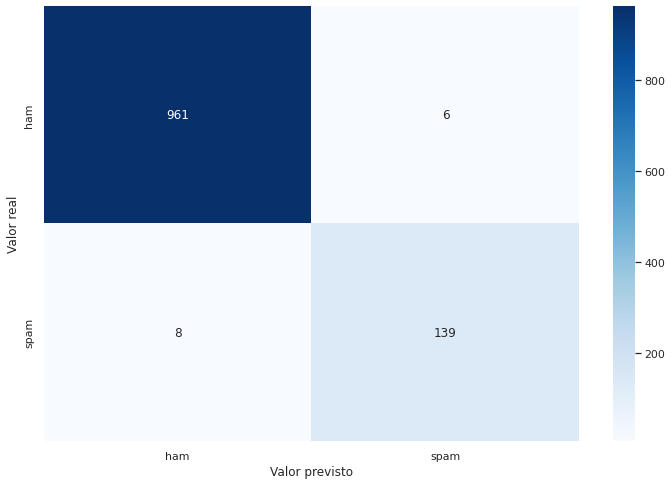

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(test_set['Label'], test_set['predicted'], rownames=['Valor real'], colnames=['Valor previsto'])
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues");

## Reference
  - [Spam Filter in Python: Naive Bayes from Scrath](https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html)